<a href="https://colab.research.google.com/github/cacaomacao/CAN_for_navigation/blob/main/Superior_Colliculus_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

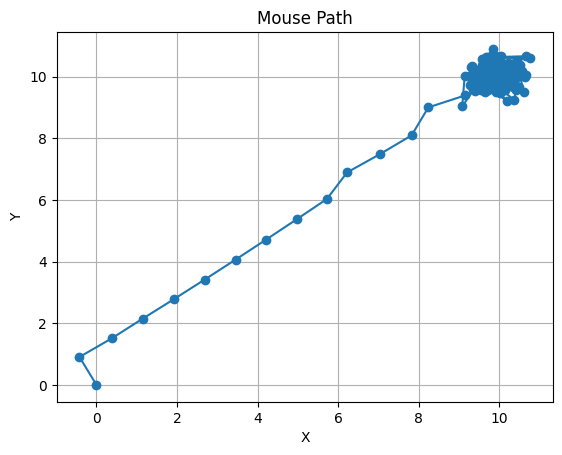

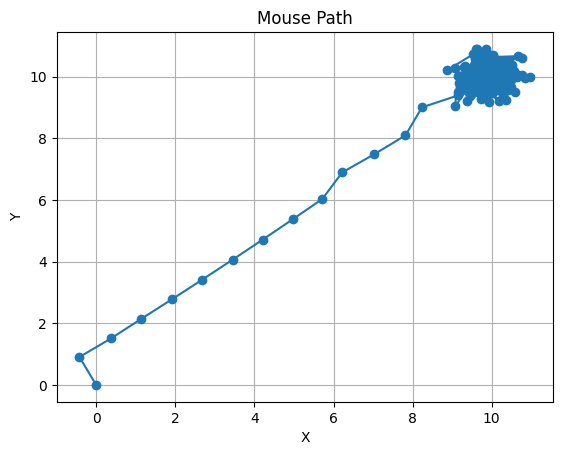

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class PID:
    def __init__(self, kp, ki, kd):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.prev_error = 0
        self.integral = 0

    def compute(self, error):
        self.integral += error
        derivative = error - self.prev_error
        output = self.kp*error + self.ki*self.integral + self.kd*derivative
        self.prev_error = error
        return output

class Mouse:
    def __init__(self, x, y, angle):
        self.x = x
        self.y = y
        self.angle = angle
        self.path = [(x, y)]

    def move(self, angle_change):
        self.angle += angle_change
        self.x += np.cos(self.angle)
        self.y += np.sin(self.angle)
        self.path.append((self.x, self.y))

    def random_walk(self):
        self.angle += np.random.uniform(-np.pi, np.pi)
        self.x += np.cos(self.angle)
        self.y += np.sin(self.angle)
        self.path.append((self.x, self.y))

def simulate(mouse, pid_controller, food_position, steps=100, stimulus_present=True):
    for _ in range(steps):
        if stimulus_present:
            error = np.arctan2(food_position[1] - mouse.y, food_position[0] - mouse.x) - mouse.angle
            angle_change = pid_controller.compute(error)

            # Introducing variability in the mouse's direction
            if np.random.rand() < 0.3:
                angle_change += np.random.normal(0, 0.5)

            mouse.move(angle_change)
        else:
            # If stimulus is not present, the mouse engages in random walk
            mouse.random_walk()

# Function to add stimulus
def add_stimulus(x, y):
    global food_position
    food_position = [x, y]

# Function to remove stimulus
def remove_stimulus():
    global food_position
    food_position = [10, 10]

def visualize(mouse):
    path = np.array(mouse.path)
    plt.plot(path[:,0], path[:,1], marker='o')
    if food_position is not None:
        plt.scatter(food_position[0], food_position[1], color='red', marker='x')
    plt.title('Mouse Path')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

# Initialize parameters
food_position = [10, 10]
mouse = Mouse(0, 0, 0)
pid_controller = PID(1.0, 0.1, 0.01)

# Simulate and visualize
simulate(mouse, pid_controller, food_position)
visualize(mouse)

# Remove stimulus and continue simulation
remove_stimulus()
simulate(mouse, pid_controller, food_position, stimulus_present=True)
visualize(mouse)


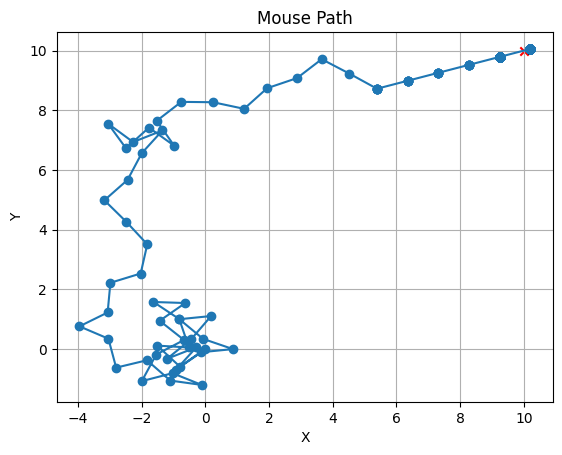

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self):
        self.head_direction_neurons = np.zeros(1)
        self.superior_colliculus_neurons = np.zeros(1)

    def sense_food(self, angle_to_food):
        self.superior_colliculus_neurons[0] = angle_to_food
        self.head_direction_neurons[0] = 0

    def approach_food(self):
        self.head_direction_neurons[0] = self.superior_colliculus_neurons[0]
class Mouse:
    def __init__(self, x, y, angle):
        self.x = x
        self.y = y
        self.angle = angle
        self.path = [(x, y)]

    def move(self, angle_change):
        self.angle += angle_change
        self.x += np.cos(self.angle)
        self.y += np.sin(self.angle)
        self.path.append((self.x, self.y))

    def random_walk(self):
        self.angle += np.random.uniform(-np.pi, np.pi)
        self.x += np.cos(self.angle)
        self.y += np.sin(self.angle)
        self.path.append((self.x, self.y))

def simulate(mouse, neural_network, food_position, steps=100):
    for _ in range(steps):
        distance_to_food = np.linalg.norm(np.array(food_position) - np.array([mouse.x, mouse.y]))
        angle_to_food = np.arctan2(food_position[1] - mouse.y, food_position[0] - mouse.x) - mouse.angle

        if distance_to_food <= 5:
            neural_network.sense_food(angle_to_food)
            # Simulate freezing behavior (mouse doesn't move for a few steps)
            for _ in range(5):
                mouse.path.append((mouse.x, mouse.y))
            neural_network.approach_food()
            angle_change = neural_network.head_direction_neurons[0]
            mouse.move(angle_change)
        else:
            mouse.random_walk()
# Function to add stimulus
def add_stimulus(x, y):
    global food_position
    food_position = [x, y]

# Function to remove stimulus
def remove_stimulus():
    global food_position
    food_position = [10, 10]

def visualize(mouse):
    path = np.array(mouse.path)
    plt.plot(path[:,0], path[:,1], marker='o')
    if food_position is not None:
        plt.scatter(food_position[0], food_position[1], color='red', marker='x')
    plt.title('Mouse Path')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()
# Initialize parameters
food_position = [10, 10]
mouse = Mouse(0, 0, 0)
neural_network = NeuralNetwork()

# Simulate and visualize
simulate(mouse, neural_network, food_position)
visualize(mouse)

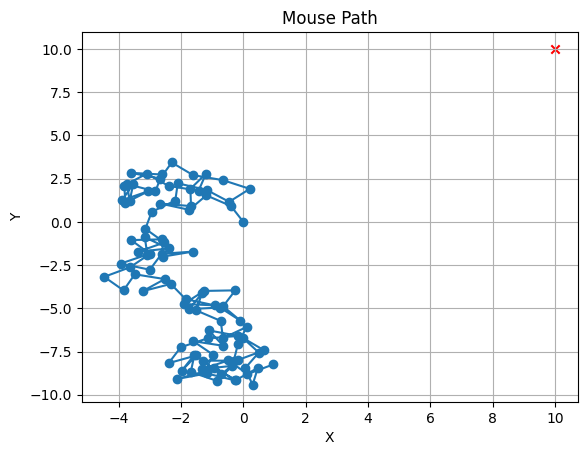

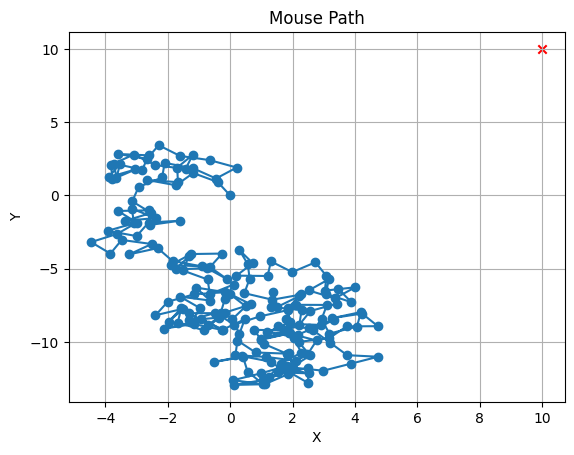

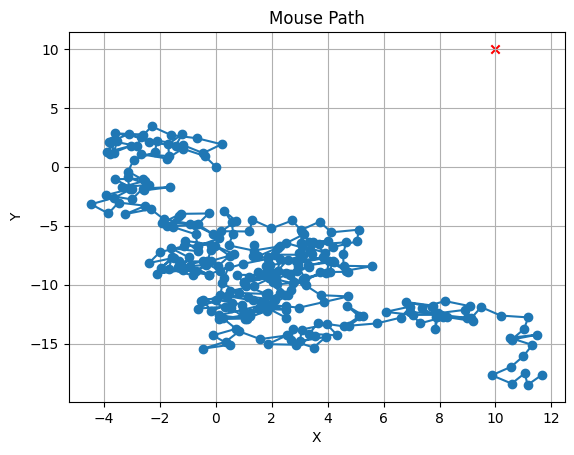

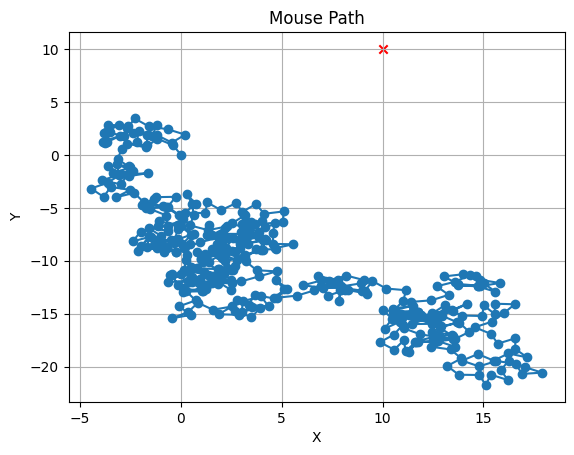

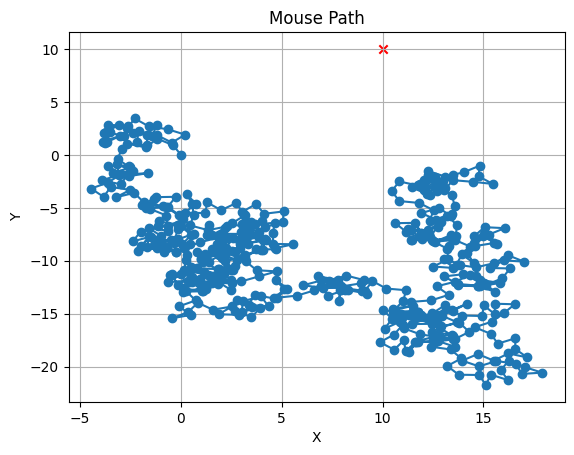

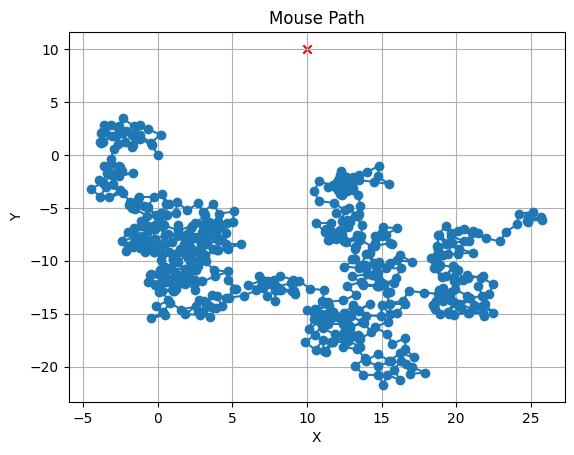

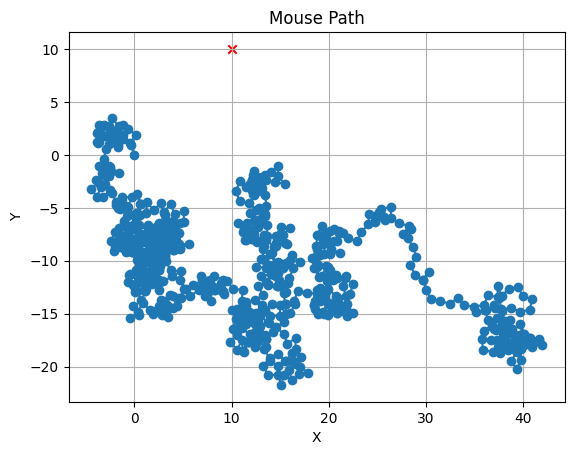

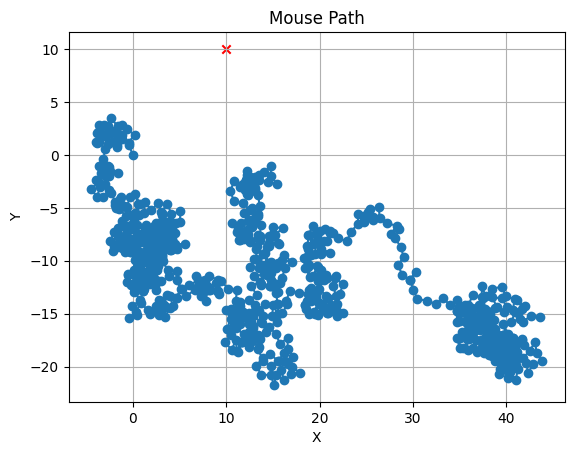

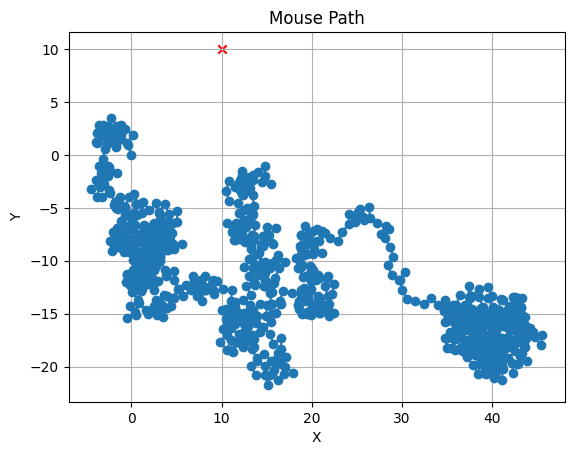

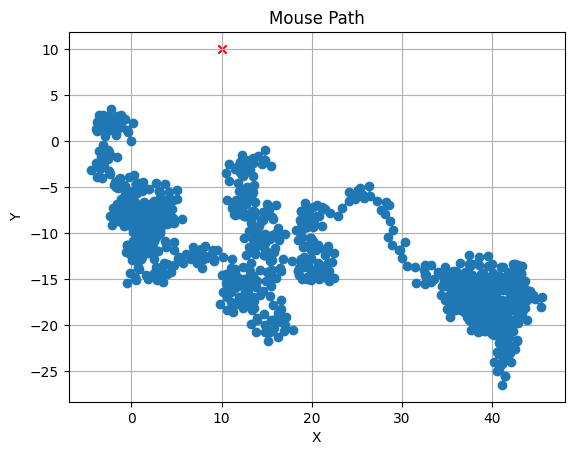

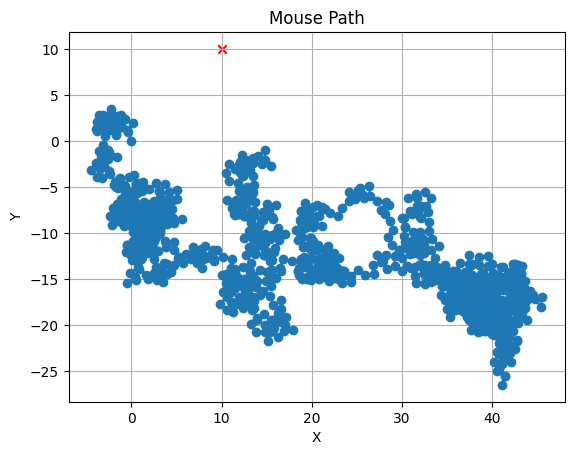

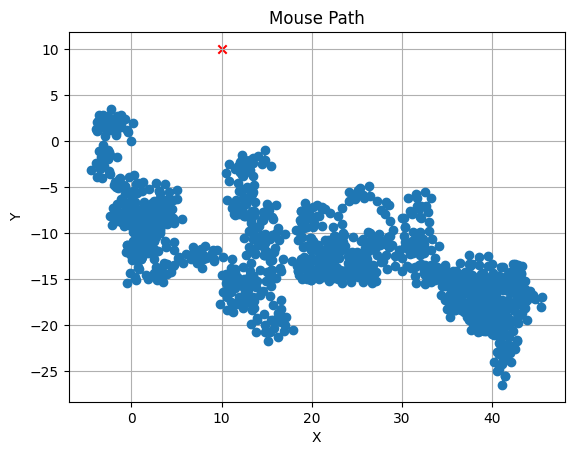

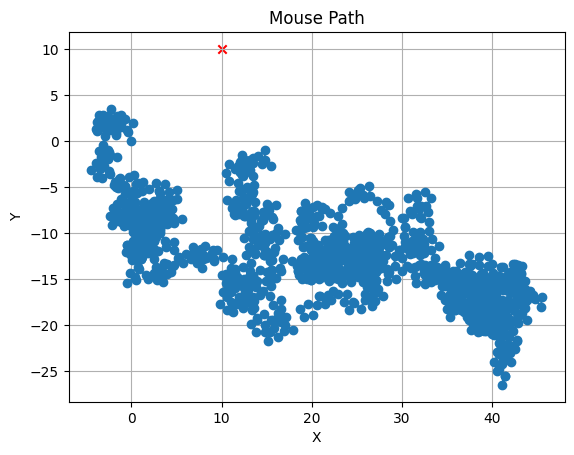

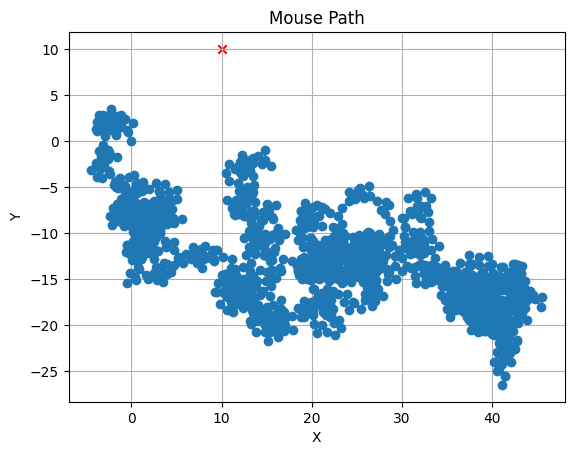

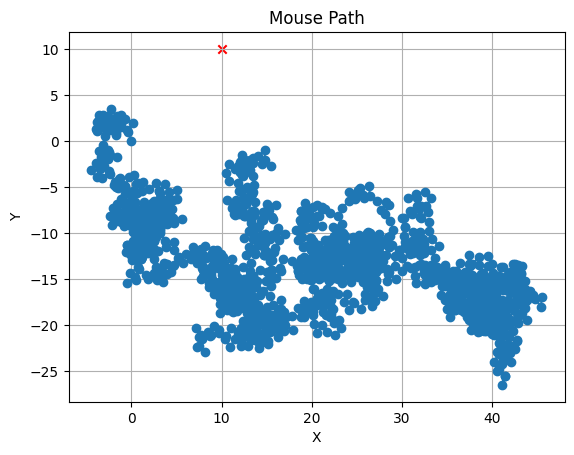

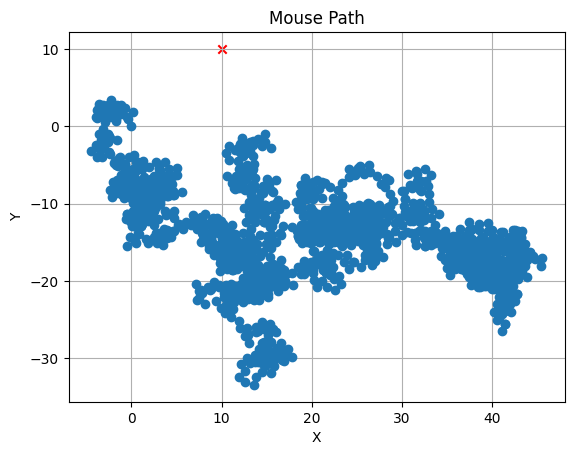

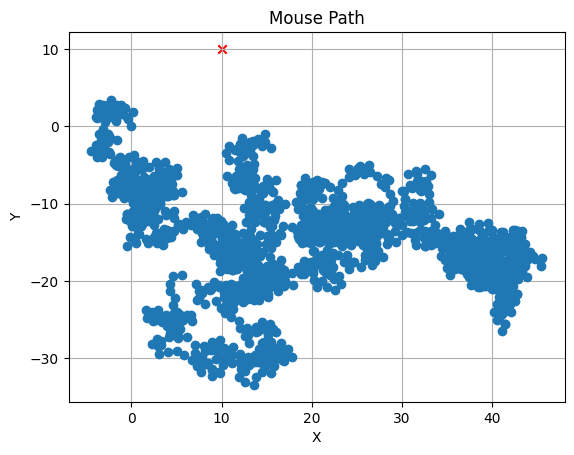

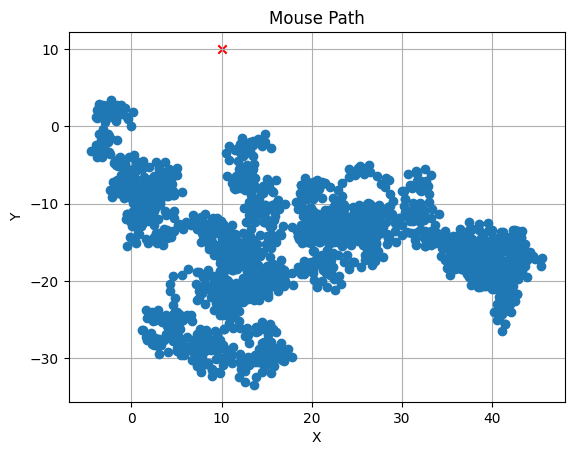

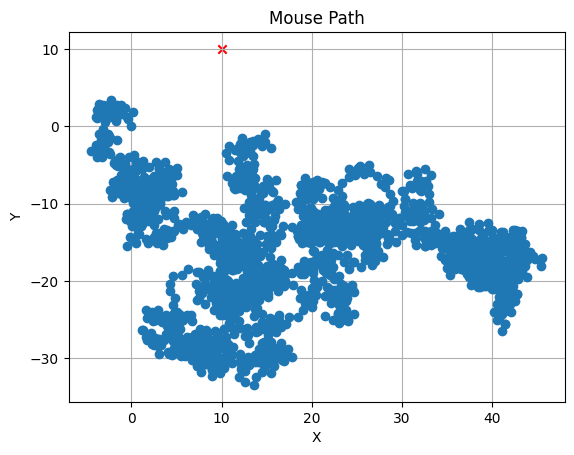

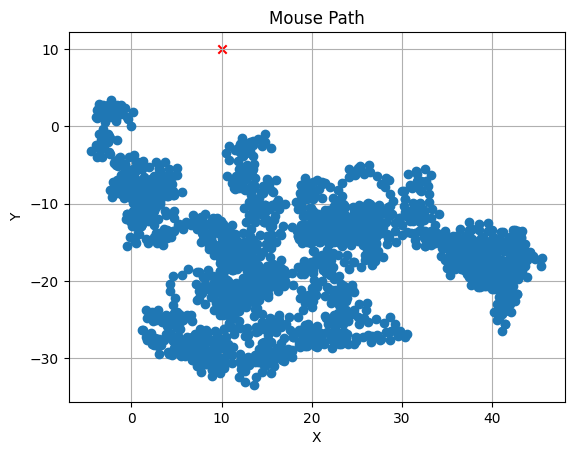

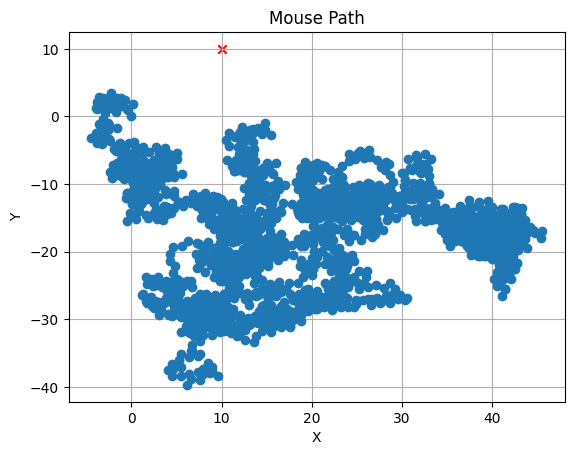

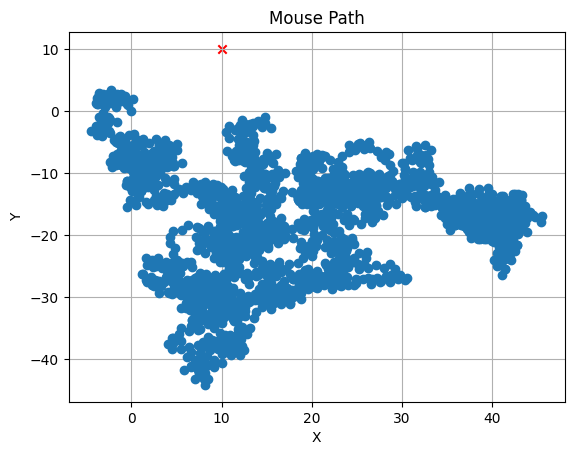

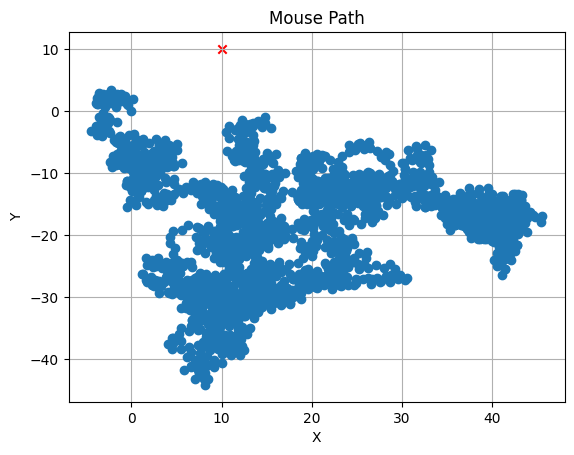

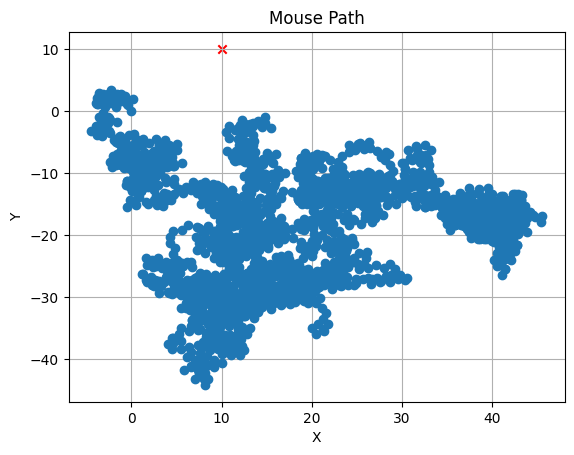

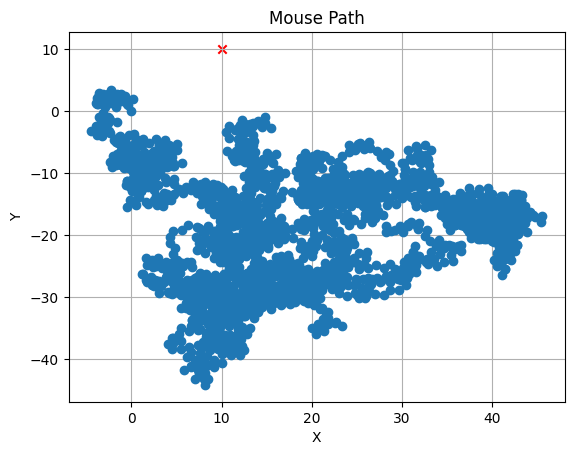

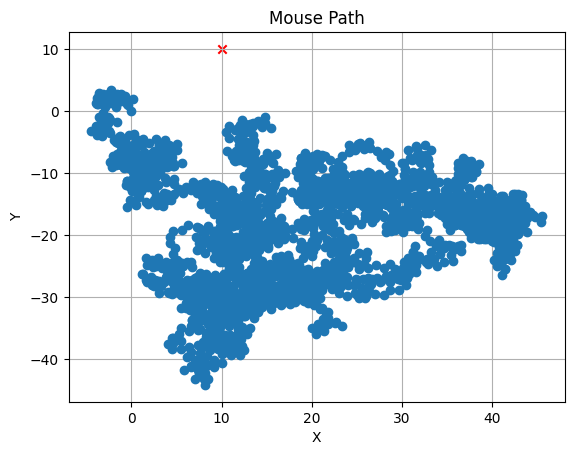

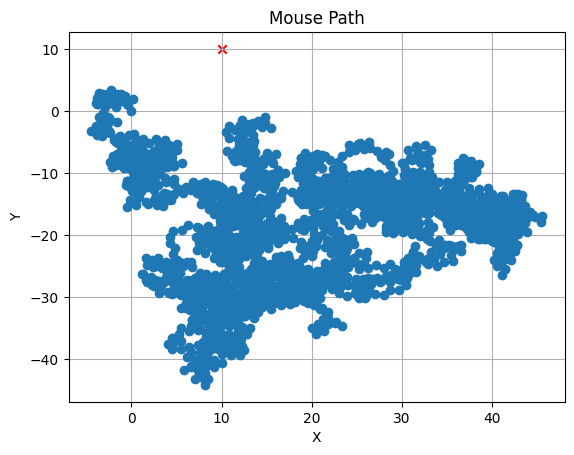

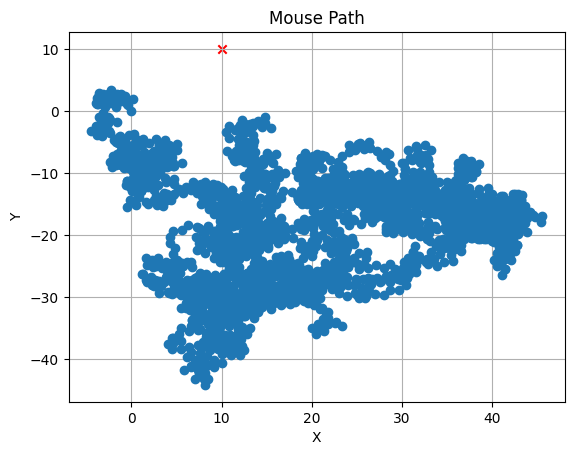

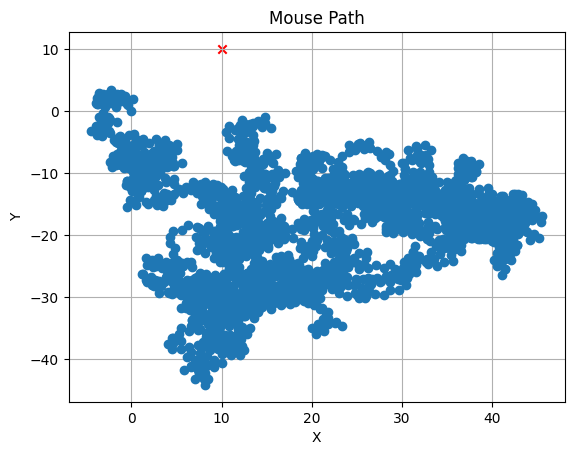

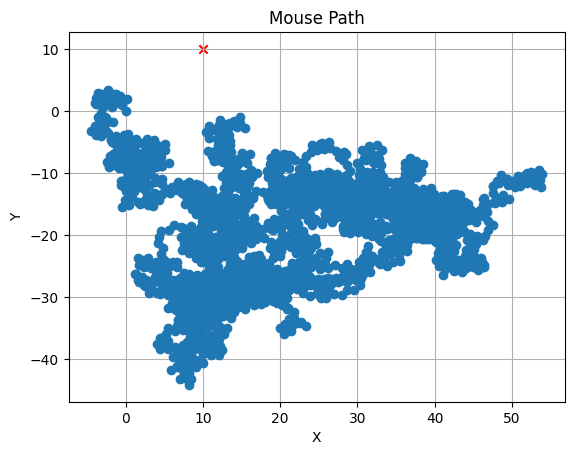

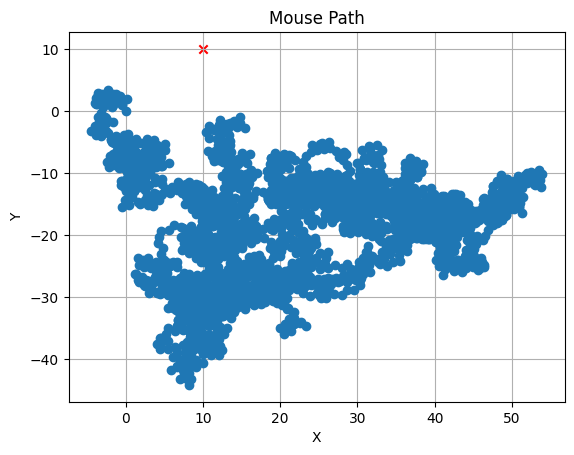

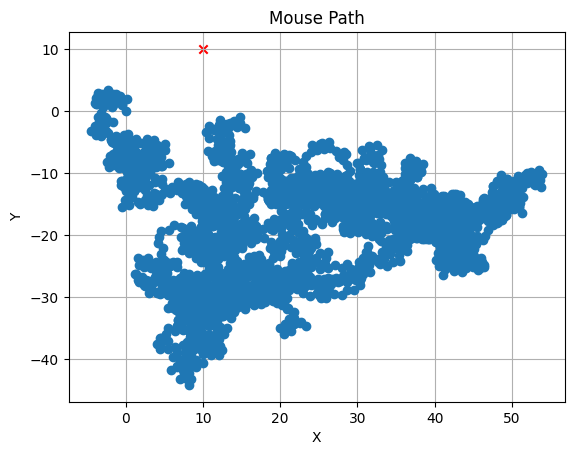

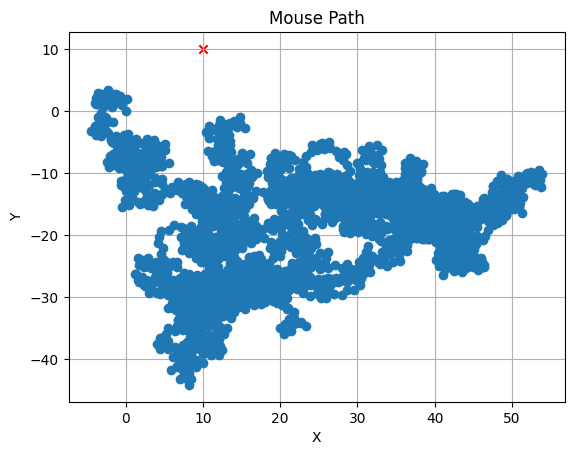

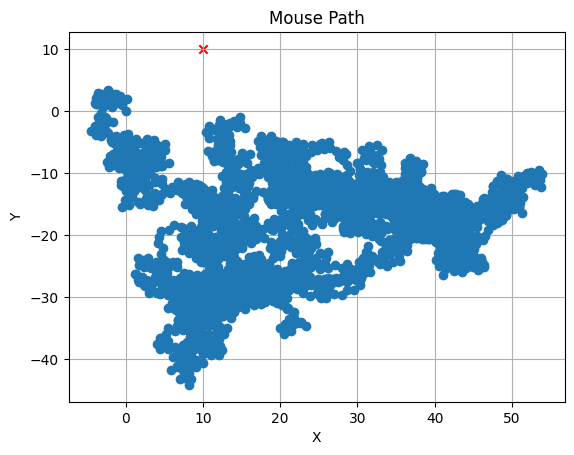

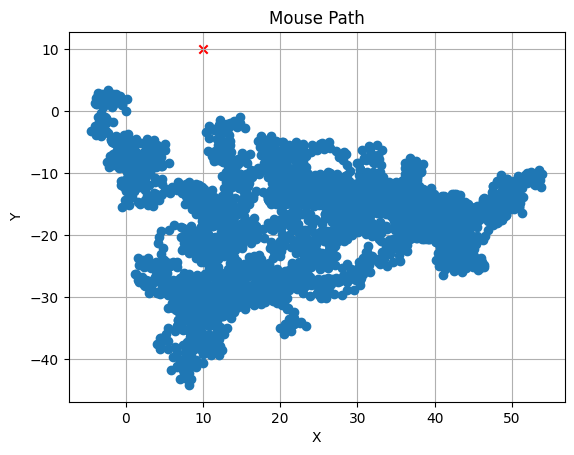

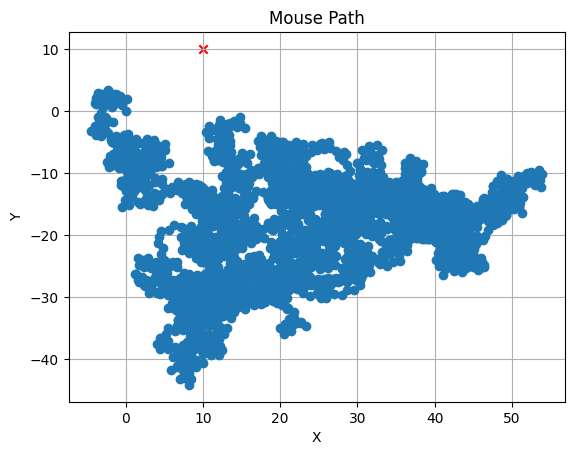

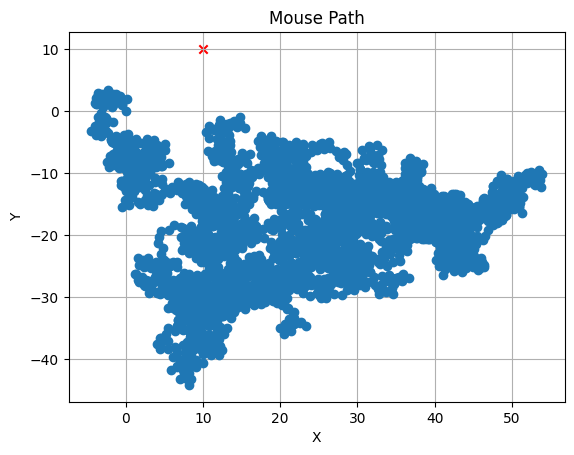

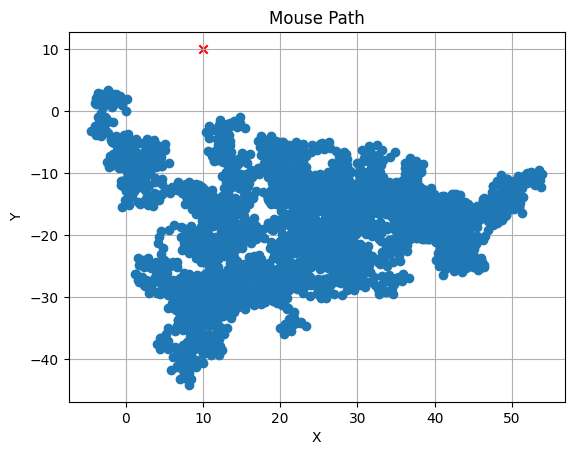

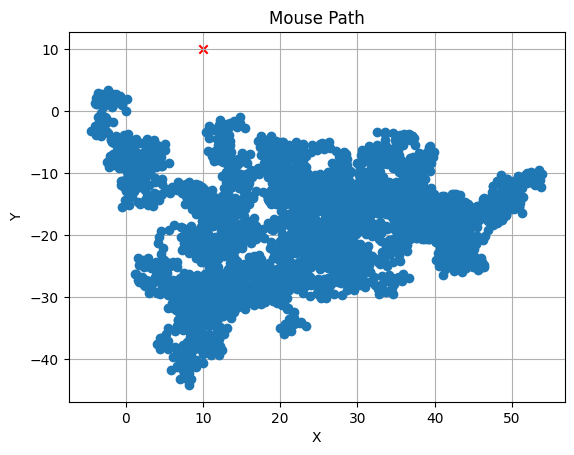

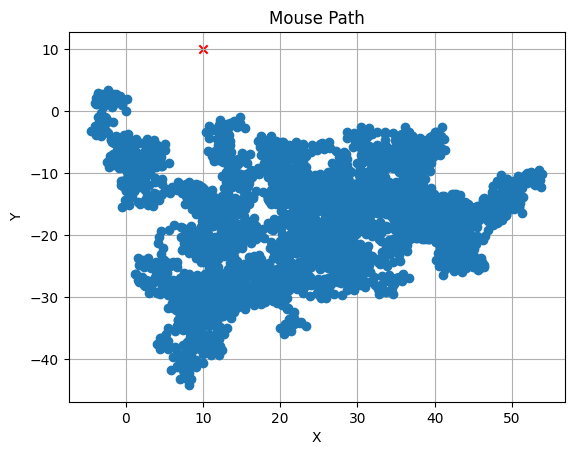

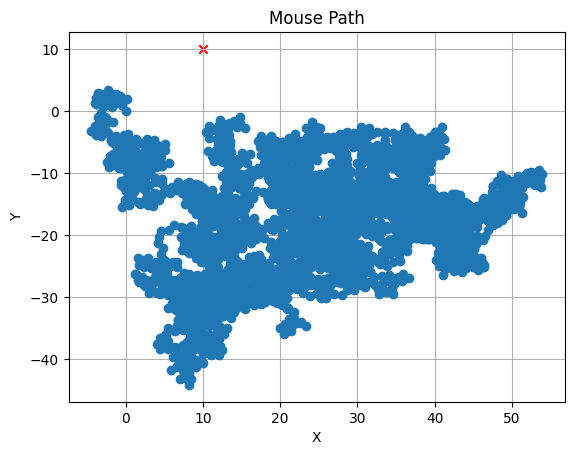

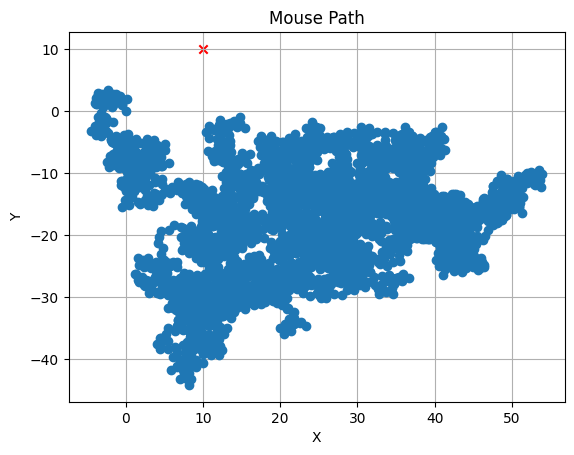

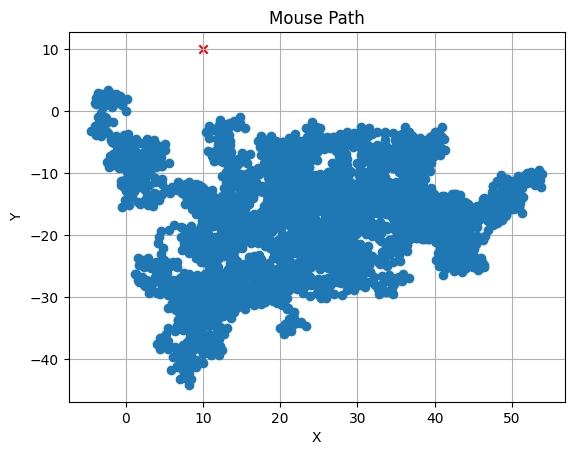

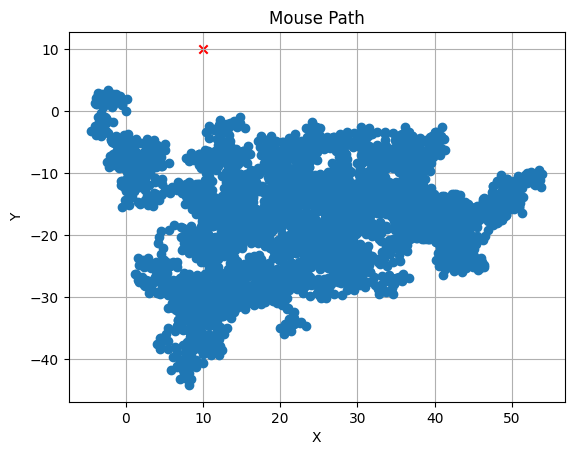

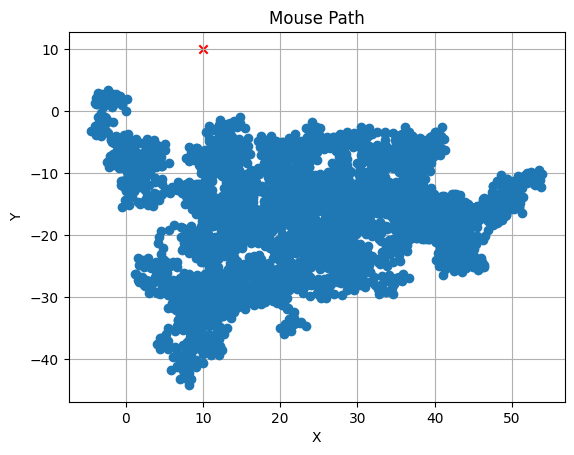

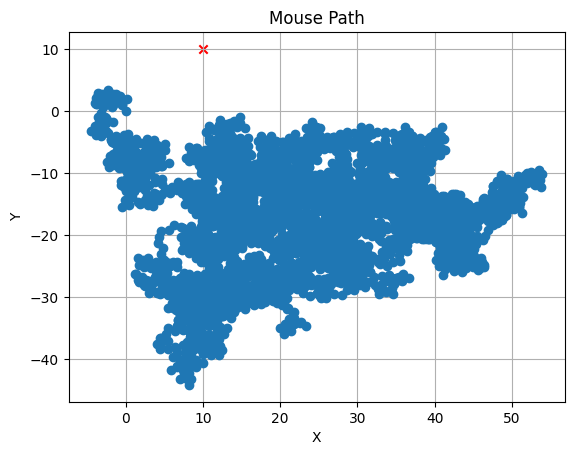

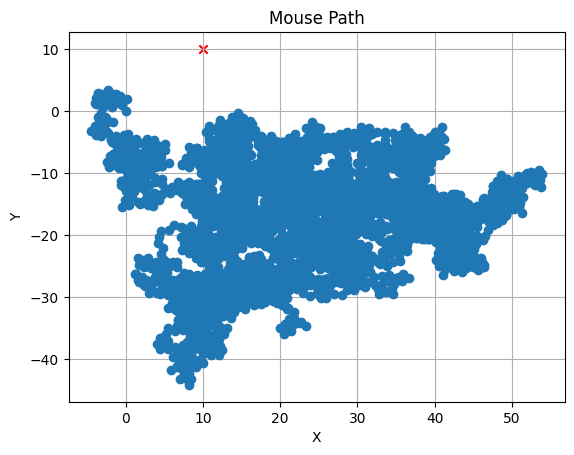

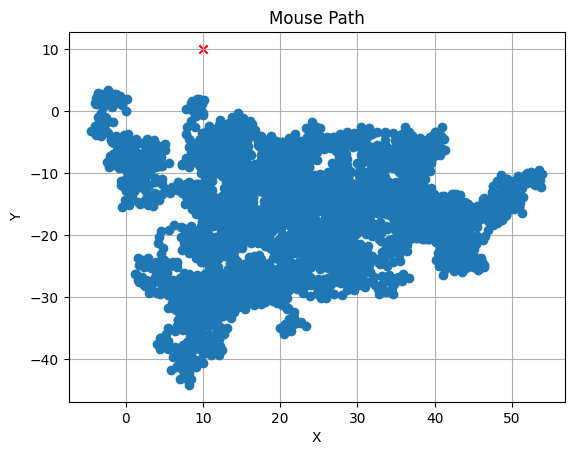

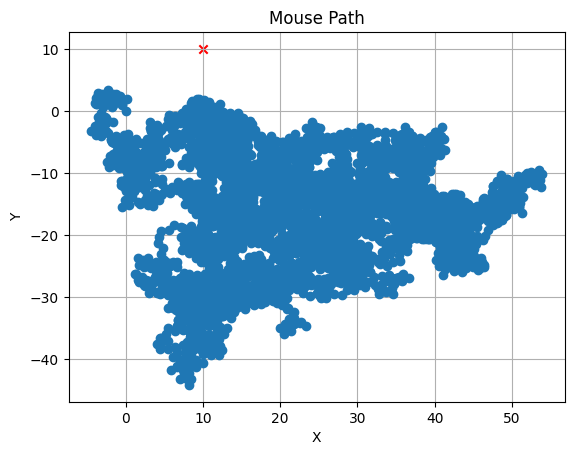

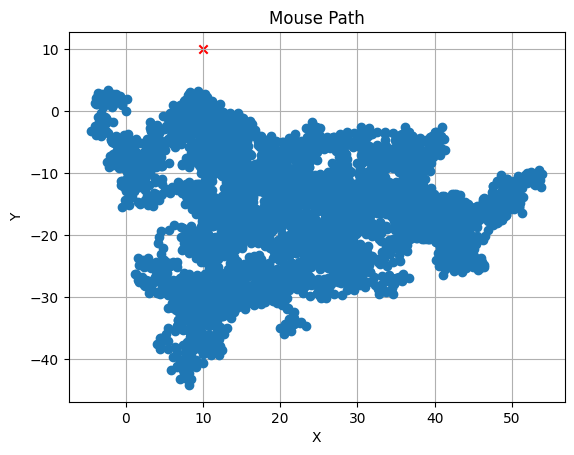

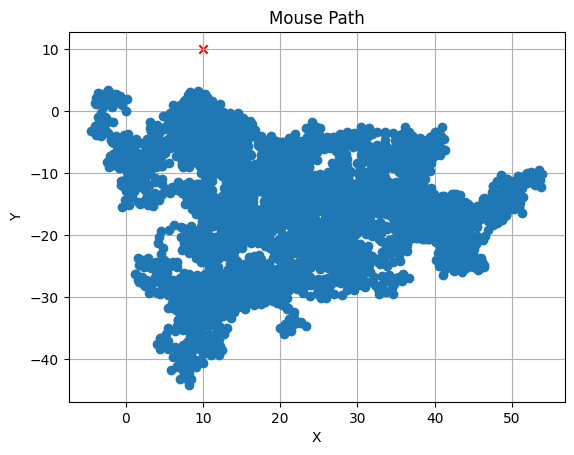

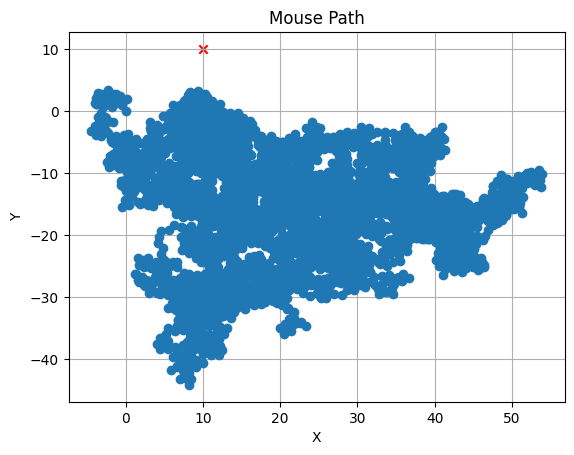

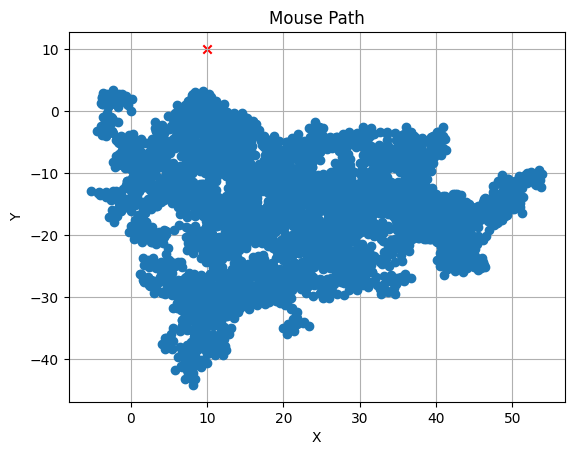

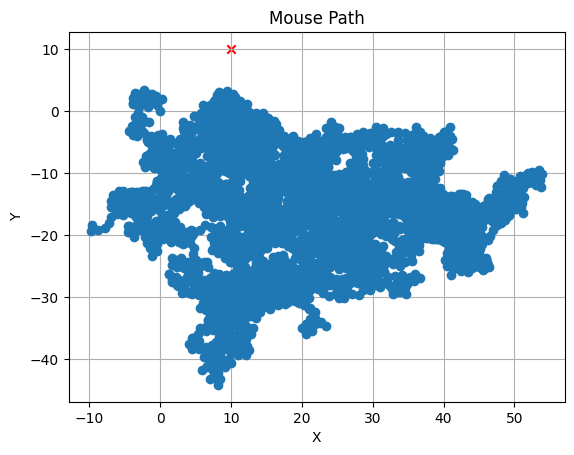

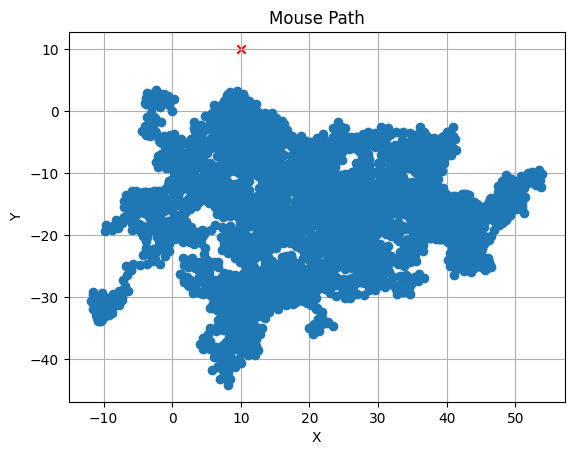

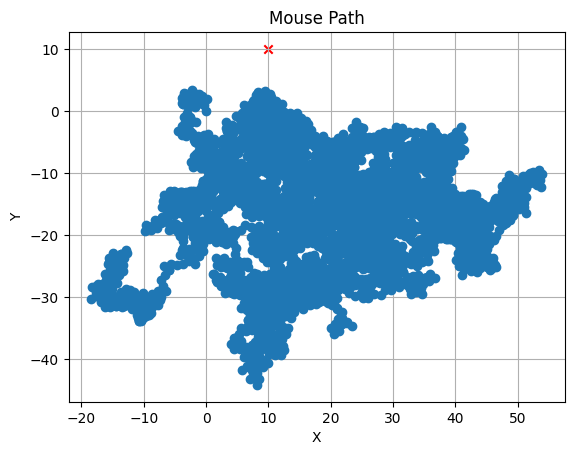

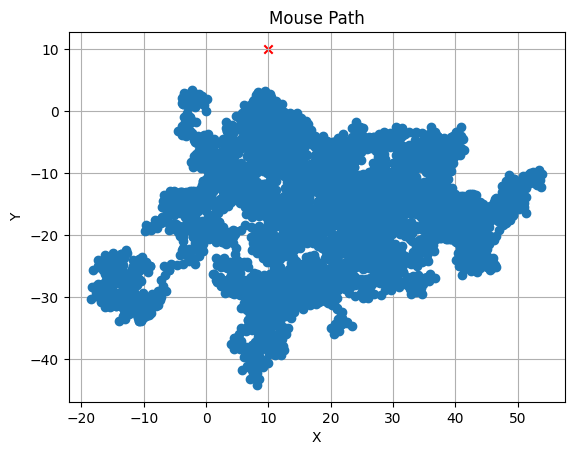

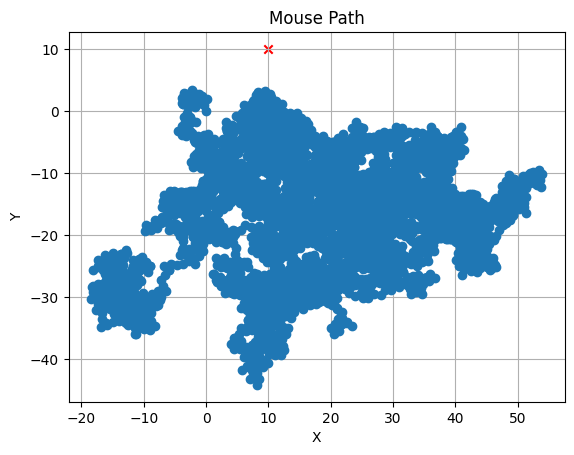

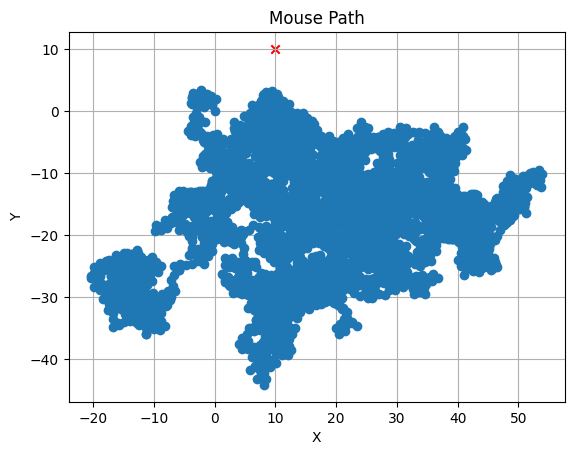

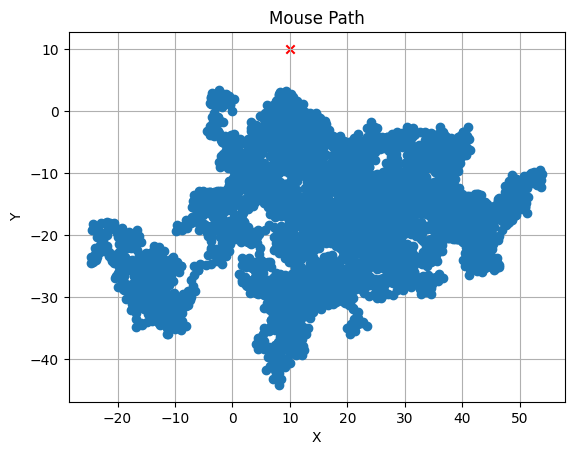

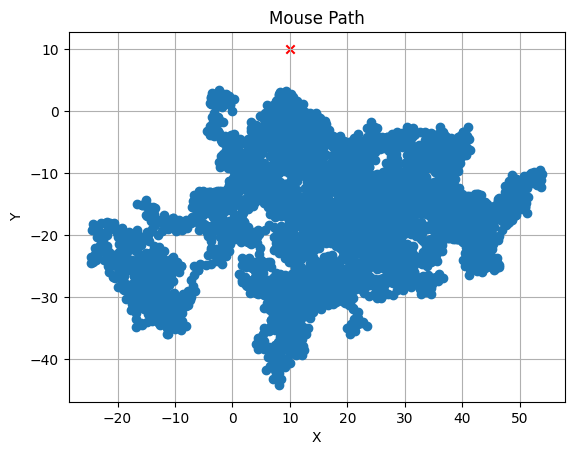

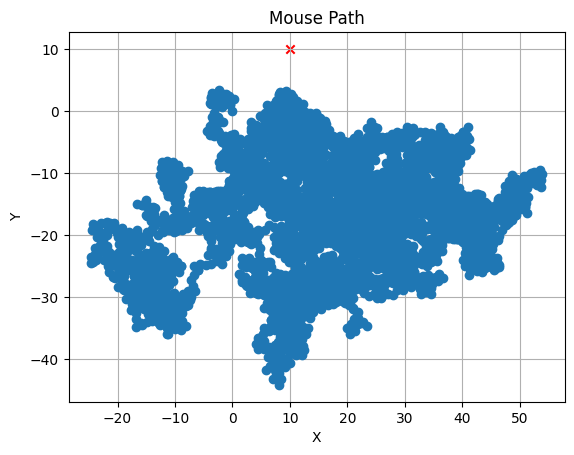

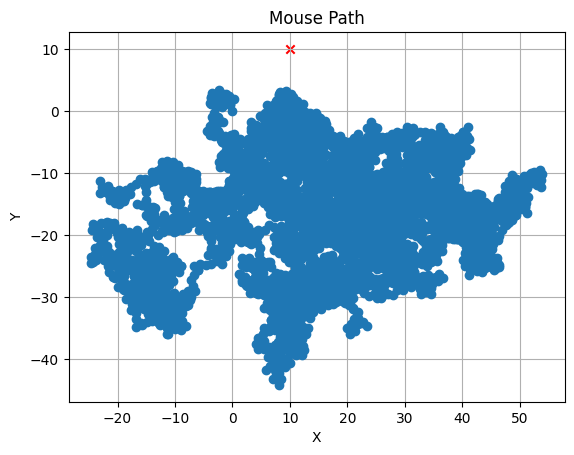

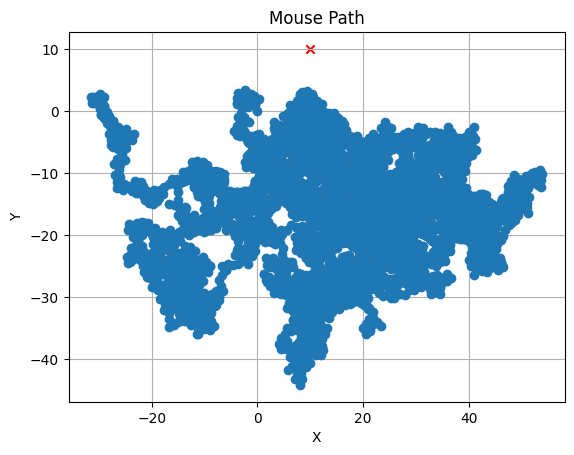

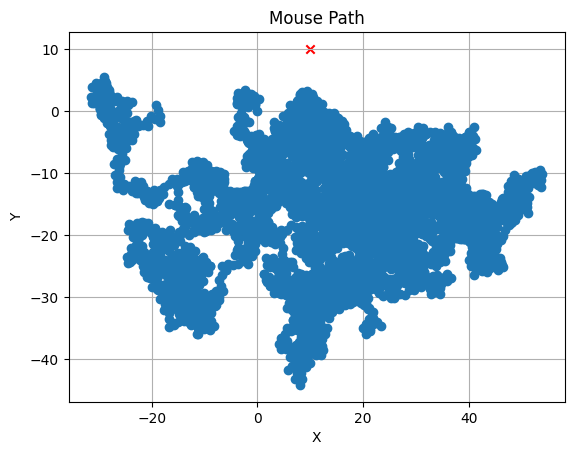

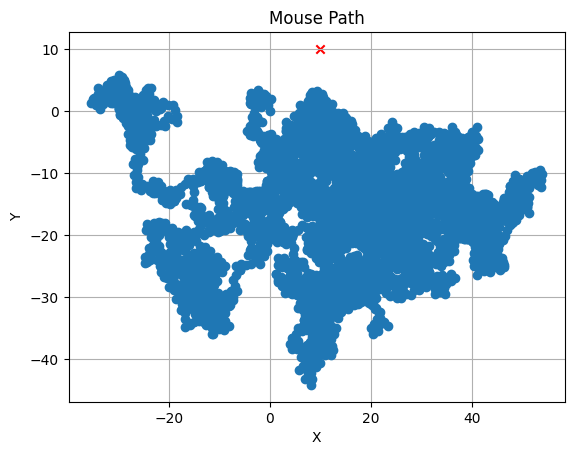

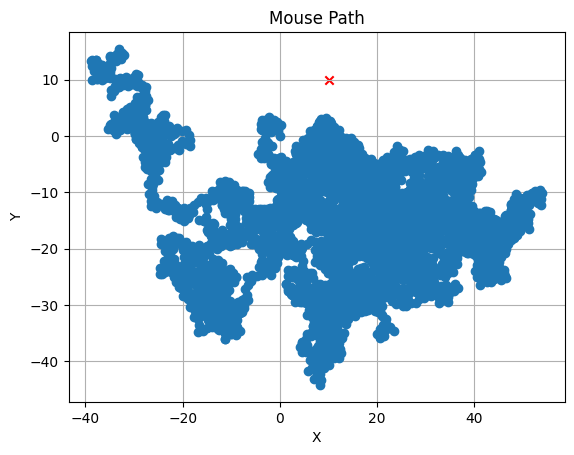

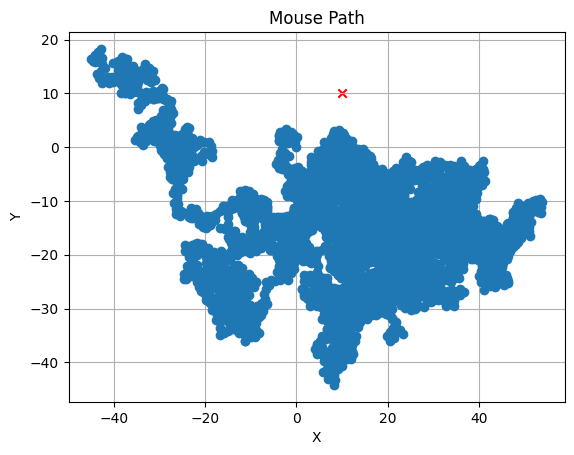

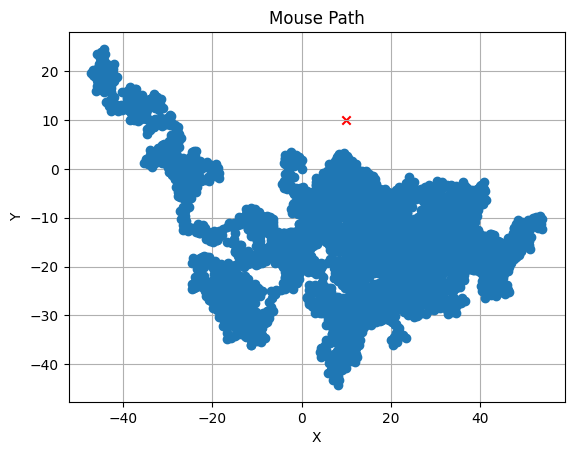

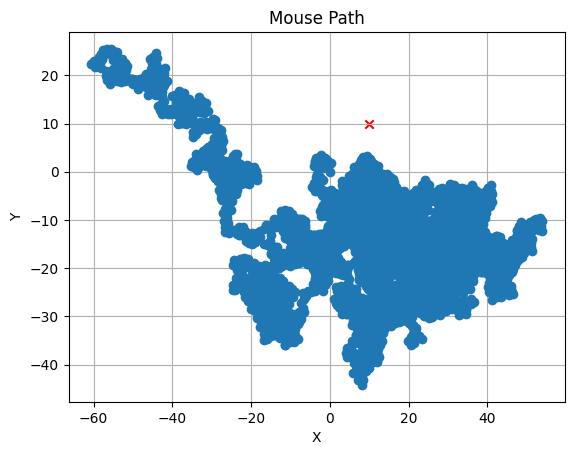

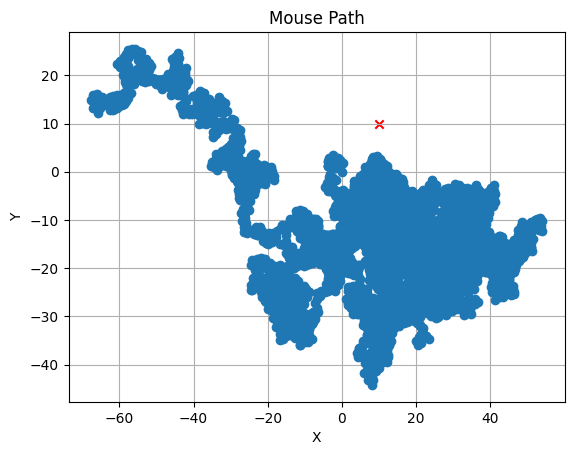

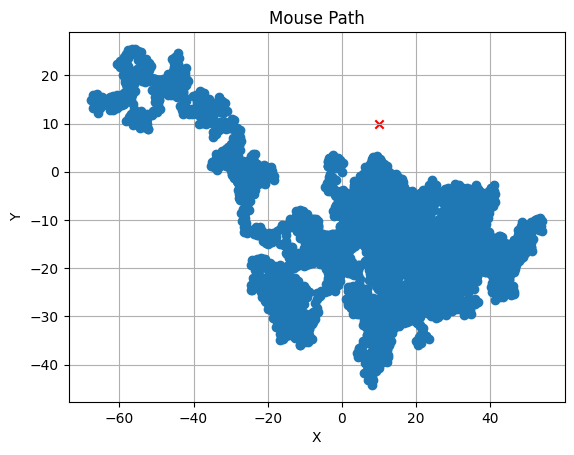

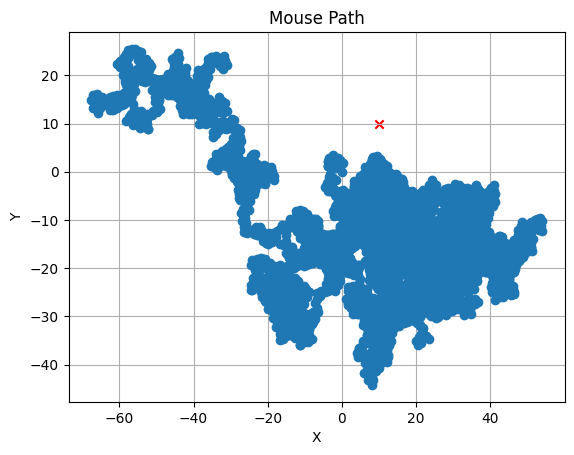

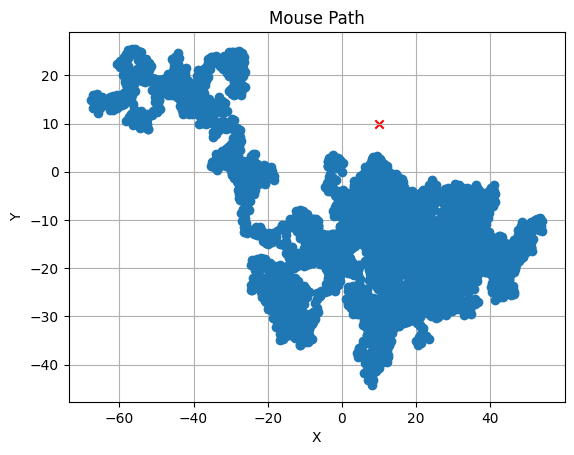

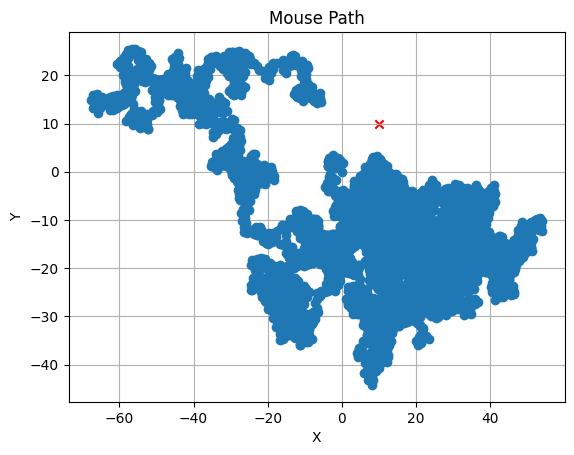

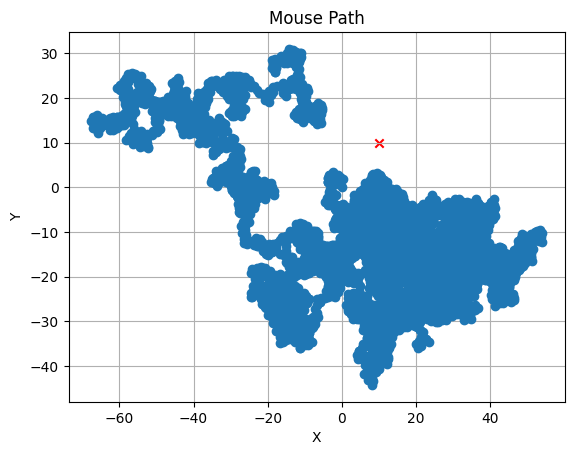

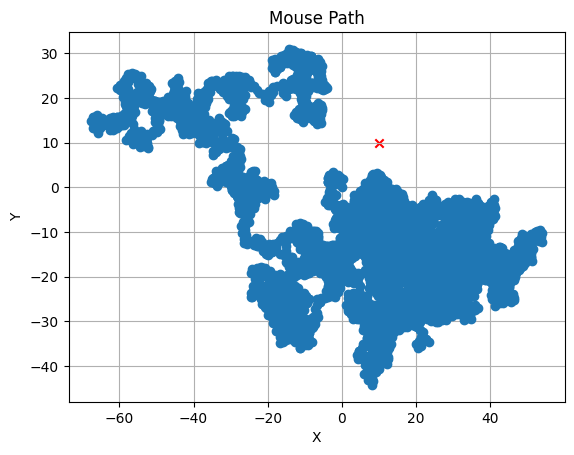

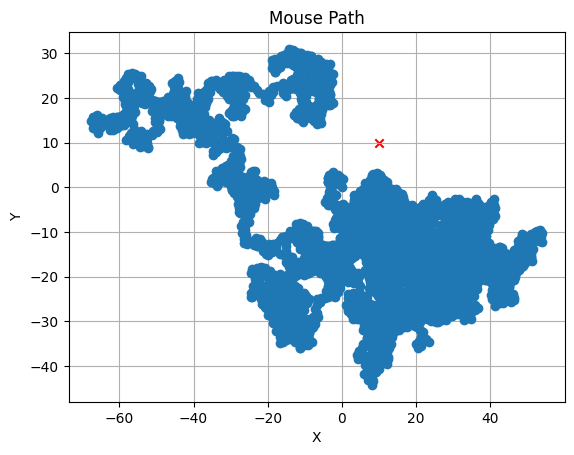

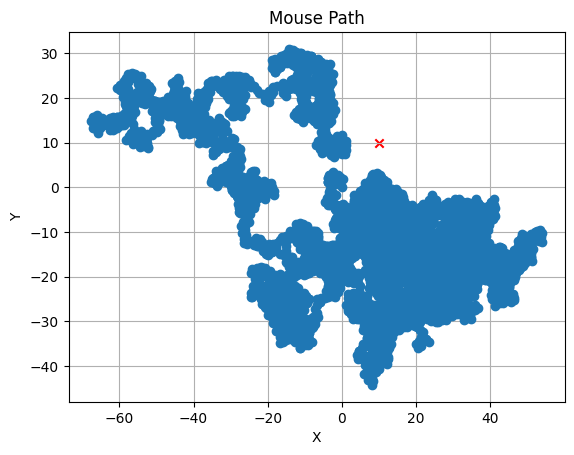

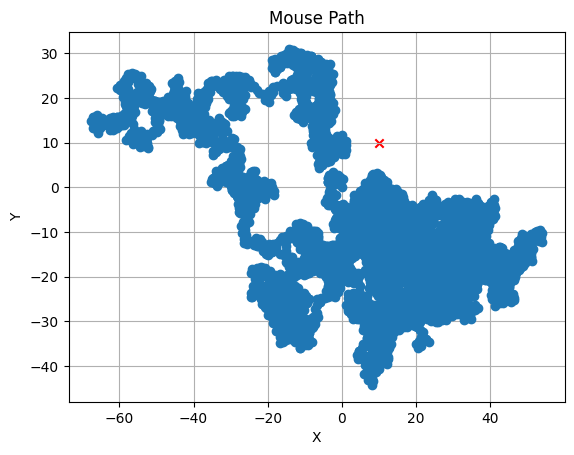

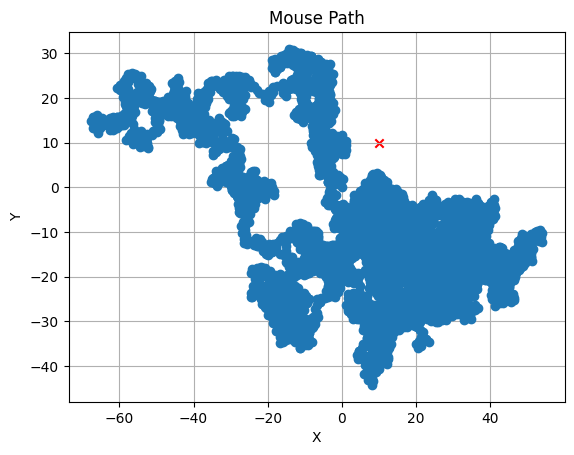

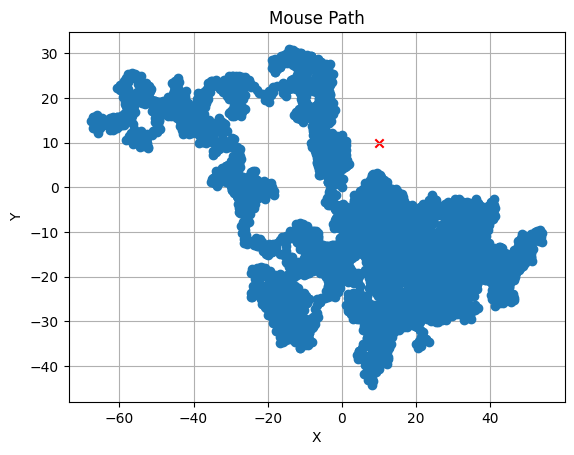

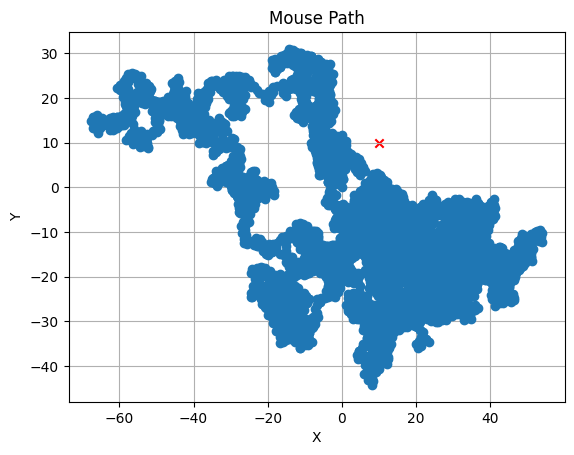

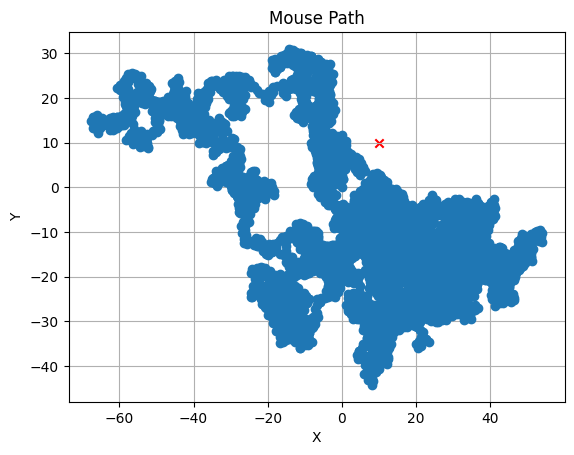

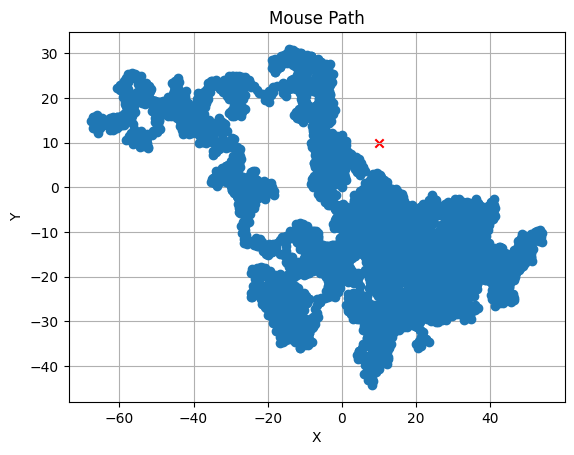

IndexError: ignored

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self):
        self.superior_colliculus_layer = np.zeros(8)  # Representing 8 possible directions
        self.head_direction_layer = np.zeros(8)  # Representing 8 possible directions

    def sense_food(self, angle_to_food):
        direction_idx = int(angle_to_food // (2 * np.pi / 8))
        self.superior_colliculus_layer[direction_idx] = 1

    def approach_food(self):
        self.head_direction_layer = self.superior_colliculus_layer.copy()

    def get_motor_command(self):
        return np.argmax(self.head_direction_layer) * (2 * np.pi / 8)
class Mouse:
    def __init__(self, x, y, angle):
        self.x = x
        self.y = y
        self.angle = angle
        self.path = [(x, y)]

    def move(self, angle_change):
        self.angle += angle_change
        self.x += np.cos(self.angle)
        self.y += np.sin(self.angle)
        self.path.append((self.x, self.y))

    def random_walk(self):
        self.angle += np.random.uniform(-np.pi, np.pi)
        self.x += np.cos(self.angle)
        self.y += np.sin(self.angle)
        self.path.append((self.x, self.y))

def simulate(mouse, neural_network, food_position, steps=100):
    for _ in range(steps):
        distance_to_food = np.linalg.norm(np.array(food_position) - np.array([mouse.x, mouse.y]))
        angle_to_food = np.arctan2(food_position[1] - mouse.y, food_position[0] - mouse.x) - mouse.angle

        if distance_to_food <= 5:
            neural_network.sense_food(angle_to_food)
            # Simulate freezing behavior (mouse doesn't move for a few steps)
            for _ in range(5):
                mouse.path.append((mouse.x, mouse.y))
            neural_network.get_motor_command()
            angle_change = neural_network.head_direction_layer[0]
            mouse.move(angle_change)
        else:
            mouse.random_walk()
# Function to add stimulus
def add_stimulus(x, y):
    global food_position
    food_position = [x, y]

# Function to remove stimulus
def remove_stimulus():
    global food_position
    food_position = [10, 10]

def visualize(mouse):
    path = np.array(mouse.path)
    plt.plot(path[:,0], path[:,1], marker='o')
    if food_position is not None:
        plt.scatter(food_position[0], food_position[1], color='red', marker='x')
    plt.title('Mouse Path')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()
# Initialize parameters
food_position = [10, 10]
mouse = Mouse(0, 0, 0)
neural_network = NeuralNetwork()

# Simulate and visualize
while True:
    simulate(mouse, neural_network, food_position)
    visualize(mouse)


# In the simulate function, you would use neural_network.get_motor_command() to get the motor command to move the mouse.
# Сделать чтобы мышь рядом с целью бежала туда (масштаб поменять)
# делать чтобы очищался аутпут и оставался один обновляющийся график

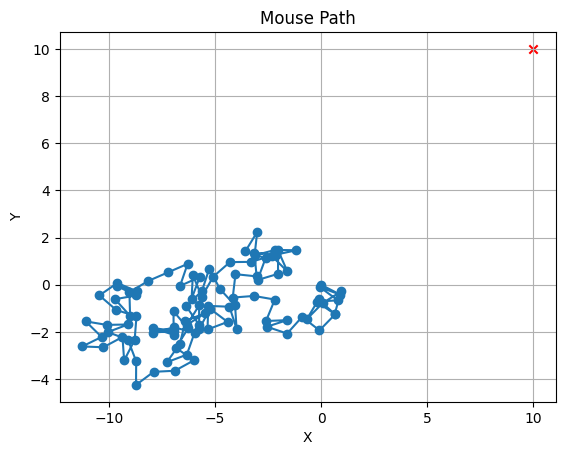

In [ ]:
# Complicated CAN model
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, num_neurons=8):
        self.num_neurons = num_neurons
        self.preferred_directions = np.linspace(0, 2*np.pi, num_neurons, endpoint=False)
        self.activities = np.zeros(num_neurons)
        self.weight_matrix = self.create_weight_matrix()

    def create_weight_matrix(self):
        weight_matrix = np.zeros((self.num_neurons, self.num_neurons))
        for i in range(self.num_neurons):
            for j in range(self.num_neurons):
                angle_diff = np.abs(self.preferred_directions[i] - self.preferred_directions[j])
                angle_diff = min(angle_diff, 2*np.pi - angle_diff)
                weight_matrix[i, j] = np.exp(-angle_diff**2 / (2 * (np.pi/4)**2))
        return weight_matrix

    def update_activities(self, external_input):
        self.activities = np.dot(self.weight_matrix, self.activities) + external_input
        self.activities = np.maximum(self.activities, 0)  # Rectified linear activation

    def get_head_direction(self):
        return np.dot(self.preferred_directions, self.activities) / np.sum(self.activities)

class Mouse:
    def __init__(self, x, y, angle):
        self.x = x
        self.y = y
        self.angle = angle
        self.path = [(x, y)]

    def move(self, angle_change):
        self.angle += angle_change
        self.x += np.cos(self.angle)
        self.y += np.sin(self.angle)
        self.path.append((self.x, self.y))

    def random_walk(self):
        self.angle += np.random.uniform(-np.pi, np.pi)
        self.x += np.cos(self.angle)
        self.y += np.sin(self.angle)
        self.path.append((self.x, self.y))

def simulate(mouse, neural_network, food_position, steps=100):
    for _ in range(steps):
        distance_to_food = np.linalg.norm(np.array(food_position) - np.array([mouse.x, mouse.y]))
        angle_to_food = np.arctan2(food_position[1] - mouse.y, food_position[0] - mouse.x) - mouse.angle

        if distance_to_food <= 5:
            external_input = np.exp(-((neural_network.preferred_directions - angle_to_food)**2) / (2 * (np.pi/4)**2))
            neural_network.update_activities(external_input)
            angle_change = neural_network.get_head_direction() - mouse.angle
            mouse.move(angle_change)
        else:
            mouse.random_walk()

def visualize(mouse):
    path = np.array(mouse.path)
    plt.plot(path[:,0], path[:,1], marker='o')
    plt.scatter(food_position[0], food_position[1], color='red', marker='x')
    plt.title('Mouse Path')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

# Initialize parameters
food_position = [10, 10]
mouse = Mouse(0, 0, 0)
neural_network = NeuralNetwork()

# Simulate and visualize
simulate(mouse, neural_network, food_position)
visualize(mouse)


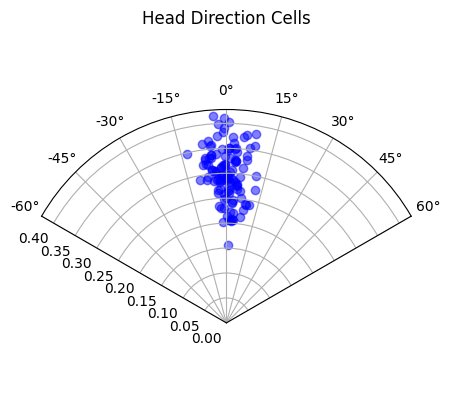

In [ ]:
# Simple CAN model # Need to implement SC map and dynamics
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, num_neurons=8):
        self.num_neurons = num_neurons
        self.preferred_directions = np.linspace(0, 2*np.pi, num_neurons, endpoint=False)
        self.activities = np.zeros(num_neurons)
        self.weight_matrix = self.create_weight_matrix()

    def create_weight_matrix(self):
        weight_matrix = np.zeros((self.num_neurons, self.num_neurons))
        for i in range(self.num_neurons):
            for j in range(self.num_neurons):
                angle_diff = np.abs(self.preferred_directions[i] - self.preferred_directions[j])
                angle_diff = min(angle_diff, 2*np.pi - angle_diff)
                weight_matrix[i, j] = np.exp(-angle_diff**2 / (2 * (np.pi/4)**2))
        return weight_matrix

    def update_activities(self, external_input):
        self.activities = np.dot(self.weight_matrix, self.activities) + external_input
        self.activities = np.maximum(self.activities, 0)  # Rectified linear activation

    def stimulate_specific_area(self, angle_in_degrees):
        # Convert the angle to radians and adjust it to be within the range [0, 2π]
        target_angle = np.radians(angle_in_degrees) % (2 * np.pi)

        # Find the neuron with the closest preferred direction to the target angle
        closest_neuron_idx = np.argmin(np.abs(self.preferred_directions - target_angle))

        # Create an external input to stimulate the closest neuron
        external_input = np.zeros(self.num_neurons)
        external_input[closest_neuron_idx] = 3

        return external_input

    def visualize(self, trials_results):
        plt.figure()
        ax = plt.subplot(111, projection='polar')
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        ax.set_thetamin(-60)
        ax.set_thetamax(60)

        for trial in trials_results:
            for i in range(self.num_neurons):
                if trial[i] > 0:
                    offset_angle = np.random.normal(0, np.pi/36)  # Adding a random offset to the angle
                    offset_radius = np.random.normal(0, 0.05)  # Adding a random offset to the radius
                    ax.scatter(self.preferred_directions[i] + offset_angle, (trial[i]*0.1 + offset_radius), c='b', alpha=0.5)

        plt.title('Head Direction Cells')
        plt.grid(True)
        plt.show()



# Initialize neural network
neural_network = NeuralNetwork()

# Run multiple trials and store the results
num_trials = 120
trials_results = []

for _ in range(num_trials):
    # Reset activities before each trial
    neural_network.activities = np.zeros(neural_network.num_neurons)

    # External input to stimulate the neuron closest to the point
    external_input = neural_network.stimulate_specific_area(0)

    # Update activities and store the results
    neural_network.update_activities(external_input)
    trials_results.append(neural_network.activities.copy())

# Visualize the results of all trials
neural_network.visualize(trials_results)


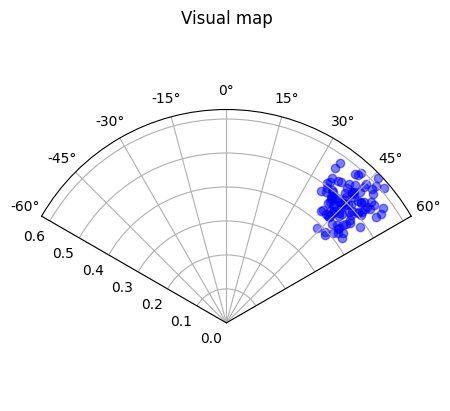

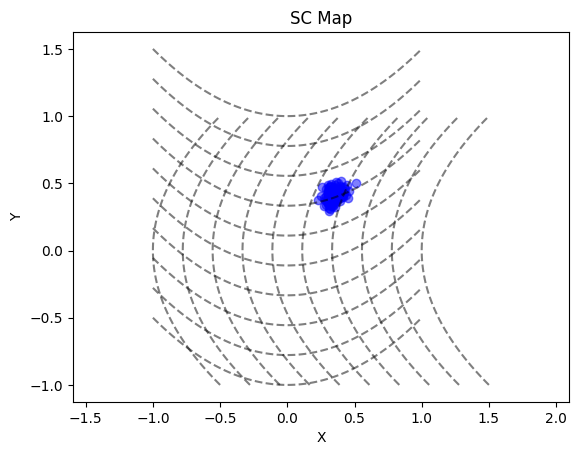

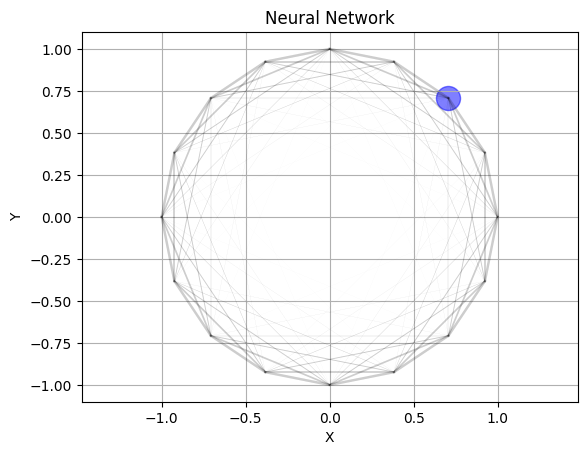

In [17]:
# CAN model with visual map and superior colliculus map
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, num_neurons=16):
        self.num_neurons = num_neurons
        self.preferred_directions = np.linspace(0, 2*np.pi, num_neurons, endpoint=False)
        self.activities = np.zeros(num_neurons)
        self.weight_matrix = self.create_weight_matrix()

    def create_weight_matrix(self):
        weight_matrix = np.zeros((self.num_neurons, self.num_neurons))
        for i in range(self.num_neurons):
            for j in range(self.num_neurons):
                angle_diff = np.abs(self.preferred_directions[i] - self.preferred_directions[j])
                angle_diff = min(angle_diff, 2*np.pi - angle_diff)
                weight_matrix[i, j] = np.exp(-angle_diff**2 / (2 * (np.pi/4)**2))
        return weight_matrix

    def update_activities(self, external_input):
        self.activities = np.dot(self.weight_matrix, self.activities) + external_input
        self.activities = np.maximum(self.activities, 0)  # Rectified linear activation

    def stimulate_specific_area(self, x, y):
        # Calculate the angle corresponding to the point (x, y)
        target_angle = np.arctan2(y, x)

        # Find the neuron with the closest preferred direction to the target angle
        closest_neuron_idx = np.argmin(np.abs(self.preferred_directions - target_angle))

        # Create an external input to stimulate the closest neuron
        external_input = np.zeros(self.num_neurons)
        external_input[closest_neuron_idx] = 3

        return external_input

    def visualize_network(self):
        plt.figure()

        # Create a circular representation of the neurons
        angles = np.linspace(0, 2*np.pi, self.num_neurons, endpoint=False)
        x = np.cos(angles)
        y = np.sin(angles)

        # Plot the neurons
        for i in range(self.num_neurons):
            plt.scatter(x[i], y[i], s=self.activities[i]*100, c='b', alpha=0.5)

        # Plot the connections (weights) between neurons
        for i in range(self.num_neurons):
            for j in range(self.num_neurons):
                if self.weight_matrix[i, j] > 0:
                    plt.plot([x[i], x[j]], [y[i], y[j]], 'k-', linewidth=self.weight_matrix[i, j]*2, alpha=0.1)

        plt.title('Neural Network')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.axis('equal')
        plt.show()



    def visualize(self, trials_results):
        plt.figure()
        ax = plt.subplot(111, projection='polar')
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        ax.set_thetamin(-60)
        ax.set_thetamax(60)

        for trial in trials_results:
            for i in range(self.num_neurons):
                if trial[i] > 0:
                    offset_angle = np.random.normal(0, np.pi/36)  # Adding a random offset to the angle
                    offset_radius = np.random.normal(0, 0.05)  # Adding a random offset to the radius
                    ax.scatter(self.preferred_directions[i] + offset_angle, 0.5 + offset_radius, c='b', alpha=0.5)

        plt.title('Visual map')
        plt.grid(True)
        plt.show()

    def visual_to_sc_map(self, x, y):
        # Apply a transformation to generate a curved SC map
        sc_x = x
        sc_y = y + 0.5*x**2
        return sc_x, sc_y

    def visualize_sc_map(self, trials_results):
        plt.figure()

        # Create a custom grid with curved lines
        x = np.linspace(-1, 1, 100)
        for i in np.linspace(-1, 1, 10):
            plt.plot(x, i + 0.5*x**2, 'k--', alpha=0.5)
            plt.plot(i + 0.5*x**2, x, 'k--', alpha=0.5)

        for trial in trials_results:
            for i in range(self.num_neurons):
                if trial[i] > 0:
                    offset_angle = np.random.normal(0, np.pi/36)  # Adding a random offset to the angle
                    offset_radius = np.random.normal(0, 0.05)  # Adding a random offset to the radius

                    # Convert polar coordinates to cartesian coordinates
                    x = (0.5 + offset_radius) * np.cos(self.preferred_directions[i] + offset_angle)
                    y = (0.5 + offset_radius) * np.sin(self.preferred_directions[i] + offset_angle)

                    # Apply the visual to SC map transformation
                    sc_x, sc_y = self.visual_to_sc_map(x, y)

                    plt.scatter(sc_x, sc_y, c='b', alpha=0.5)

        plt.title('SC Map')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(False)
        plt.axis('equal')
        plt.show()


# Initialize neural network
neural_network = NeuralNetwork()

# Run multiple trials and store the results
num_trials = 100
trials_results = []

for _ in range(num_trials):
    # Reset activities before each trial
    neural_network.activities = np.zeros(neural_network.num_neurons)

    # External input to stimulate the neuron closest to the point
    external_input = neural_network.stimulate_specific_area(0.3, 0.3)

    # Update activities and store the results
    neural_network.update_activities(external_input)
    trials_results.append(neural_network.activities.copy())

# Visualize the results of all trials
neural_network.visualize(trials_results)
# Visualize the results of all trials in SC space
neural_network.visualize_sc_map(trials_results)
# Visualize the network at this trial
neural_network.visualize_network()